# INFSCI0310 Computation in Information Science
# Department of Computer Science, SCUPI

# Assignment 3: Linear Regression
# Due on: Wednesday, December 11th, 23:59 pm

Welcome to assignment 3, where you need to build a linear regression model from scratch to predict house prices. <br>


# Data files for this assignment
In order to get hand on the assignment, you have to download the data files and allocate them into the correct directory as follows:

```
├── [your working directory]
   ├── house.csv
```

**Please make sure to use the correct path to these files when working on your own machine. Recall that the jupyter *.ipynb file (this assignment file) should be in your working directory.**

# 1. Theory Preparation

In order to build the linear regression model from scratch, you need to review/prepare the theories: <br>
1. The Math notations to use, together with their sizes/dimensionalities. <br>
2. The expression to compute the loss values, assume we are using MSE to evaluate the loss. <br>
3. The expression to compute the gradients of parameters, assume we are using gradient descent to optimize the model. <br>


### <font color='red'>Exercise 1 (20 marks) </font>
Now we state:
* $\boldsymbol{X}\in\mathbb{R}^{d\times n}$ as the feature set, $\boldsymbol{y}\in\mathbb{R}^{1\times n}$ as the ground truth house prices. <br>
* $\boldsymbol{w}\in\mathbb{R}^{d\times 1}$ as the weight vector, $b$ is the bias scalar <br>
* $L$ is the MSE loss value

As you might realize we have already helped you with the Math notations, please complete the left two tasks, and justify your answer by presenting the computational processes or any proofs related. The left two tasks are: <br>
1. The expression to compute the loss values, assume we are using MSE to evaluate the loss. <br>
2. The expression to compute the gradients of parameters, assume we are using gradient descent to optimize the model. 

**Note**: <font color='red'>Exercise 1 is the foundation of this assignment, fatal mistakes will lead to a 20% deduction of your total mark for the whole assignment.</font> <br>
**Note**: your expressions should only include the notations we gave, in other words, you need to complete these tasks using a very compact vector/matrix form. Meaning that there should not exist notations such as $\boldsymbol{x}_{i}$ or $y_{i}$ <br>
**Note**: we **only accept** jupyter Markdown answers, answers come from Word, PDF, or photos taken from an actual A4 paper, are **NOT valid**. <br>
**Note**: wrong format of Math notations (italic, bold) will **NOT** be counted as fatal mistakes, however, you need to assue the correctness of any computational flows in your answer. <br>
**Hint**: for the bias $b$, you can use $b\cdot\boldsymbol{1}$ to fit the vector/matrix form, where $\boldsymbol{1}\in\mathbb{R}^{1\times n}$.

## Exercise 1: Loss and Gradient Calculation for Linear Regression Model

Given:
- $ \boldsymbol{X} \in \mathbb{R}^{d \times n} $ as the feature set
- $ \boldsymbol{y} \in \mathbb{R}^{1 \times n} $ as the ground truth house prices
- $ \boldsymbol{w} \in \mathbb{R}^{d \times 1} $ as the weight vector
- $ b $ as the bias scalar
- $ L $ as the Mean Squared Error (MSE) loss value

### 1. Loss Value Calculation (MSE)

The Mean Squared Error (MSE) is calculated as:
$$ L = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
where $ \hat{y}_i = \boldsymbol{w}^T \boldsymbol{x}_i + b $ is the predicted value for the $i$-th sample.

To express this in matrix/vector form, we can write $ \hat{y}_i $ as:
$$ \hat{\boldsymbol{y}} = \boldsymbol{X} \boldsymbol{w} + b \cdot \boldsymbol{1} $$
where $ \hat{\boldsymbol{y}} \in \mathbb{R}^{1 \times n} $ is the vector of predicted values for all samples, and $ \boldsymbol{1} \in \mathbb{R}^{1 \times n} $ is a vector of ones.

Thus, the MSE loss can be written as:
$$ L = \frac{1}{n} (\boldsymbol{y} - (\boldsymbol{X} \boldsymbol{w} + b \cdot \boldsymbol{1}))^2 $$

### 2. Gradient Calculation for Parameters

To optimize the model using gradient descent, we need to compute the gradients of the loss function $ L $ with respect to the parameters $ \boldsymbol{w} $ and $ b $.

#### Gradient with respect to $ \boldsymbol{w} $:
$$ \frac{\partial L}{\partial \boldsymbol{w}} = \frac{2}{n} (\boldsymbol{X} \boldsymbol{w} + b \cdot \boldsymbol{1} - \boldsymbol{y}) \boldsymbol{X}^T $$

#### Gradient with respect to $ b $:
$$ \frac{\partial L}{\partial b} = \frac{2}{n} (\boldsymbol{X} \boldsymbol{w} + b \cdot \boldsymbol{1} - \boldsymbol{y}) \boldsymbol{1}^T $$

These expressions provide the methods for calculating the loss value and parameter gradients, which are fundamental in building a linear regression model.

# 2. Data and Model

After knowing these computations from a foudamental level, we can code the linear regression task now, but before that, let's load and view the data:

In [16]:
import pandas as pd
house = pd.read_csv('./house.csv', header=0)
print(house)

      Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... 

This dataset was collected over several years for the city of Ames, Iowa. As you can see, there are a lot of features to look, to make this assignment simpler, we focus on a subset of this dataset, *house_filtered*:

In [17]:
house_filtered = house[(house['Bldg Type']=='1Fam') & (house['Sale Condition']=='Normal')]
house_filtered = house_filtered[['SalePrice','1st Flr SF', '2nd Flr SF', 'Total Bsmt SF', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Lot Area', 'Year Built', 'Yr Sold']]
print(house_filtered)

      SalePrice  1st Flr SF  2nd Flr SF  Total Bsmt SF  Garage Area  \
0        215000        1656           0         1080.0        528.0   
1        105000         896           0          882.0        730.0   
2        172000        1329           0         1329.0        312.0   
3        244000        2110           0         2110.0        522.0   
4        189900         928         701          928.0        482.0   
...         ...         ...         ...            ...          ...   
2925     142500        1003           0         1003.0        588.0   
2926     131000         902           0          864.0        484.0   
2927     132000         970           0          912.0          0.0   
2928     170000        1389           0         1389.0        418.0   
2929     188000         996        1004          996.0        650.0   

      Wood Deck SF  Open Porch SF  Lot Area  Year Built  Yr Sold  
0              210             62     31770        1960     2010  
1            

## <font color='red'>Exercise 2 (15 marks) </font>
In *house_filtered*, the data column *SalePrice* denotes the house prices that require prediction, other data columns are features. <br>
In this exercise, you need to take a deeper look into the data, answer the following questions, code analysis and demonstrations to justify your answer:

1. Do you think the house prices in *house_filtered* are suitably distributed to construct the regression model?
2. Any features that you want to remove from the dataset? If yes, please point out the column names of these features.
3. Any pre-processing you would like to apply on *house_filtered*? If yes, please state the reason and proceed your pre-processing for the next step of usage.

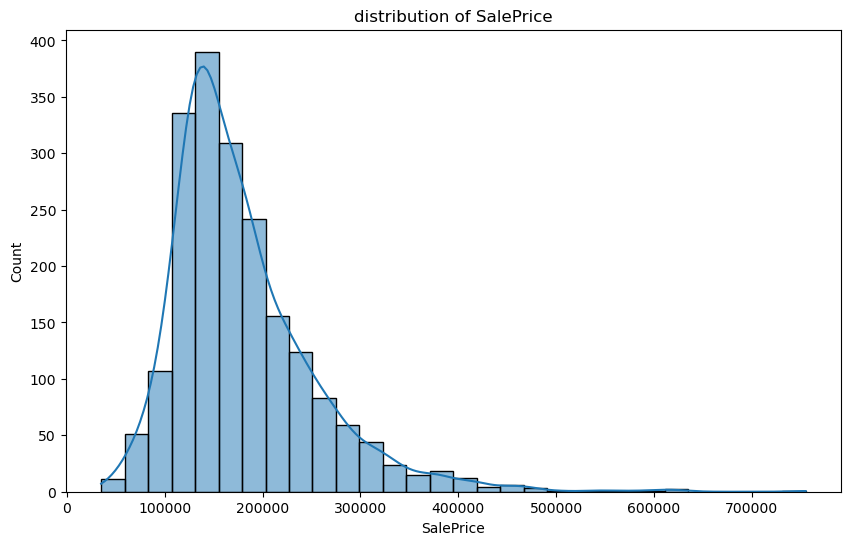

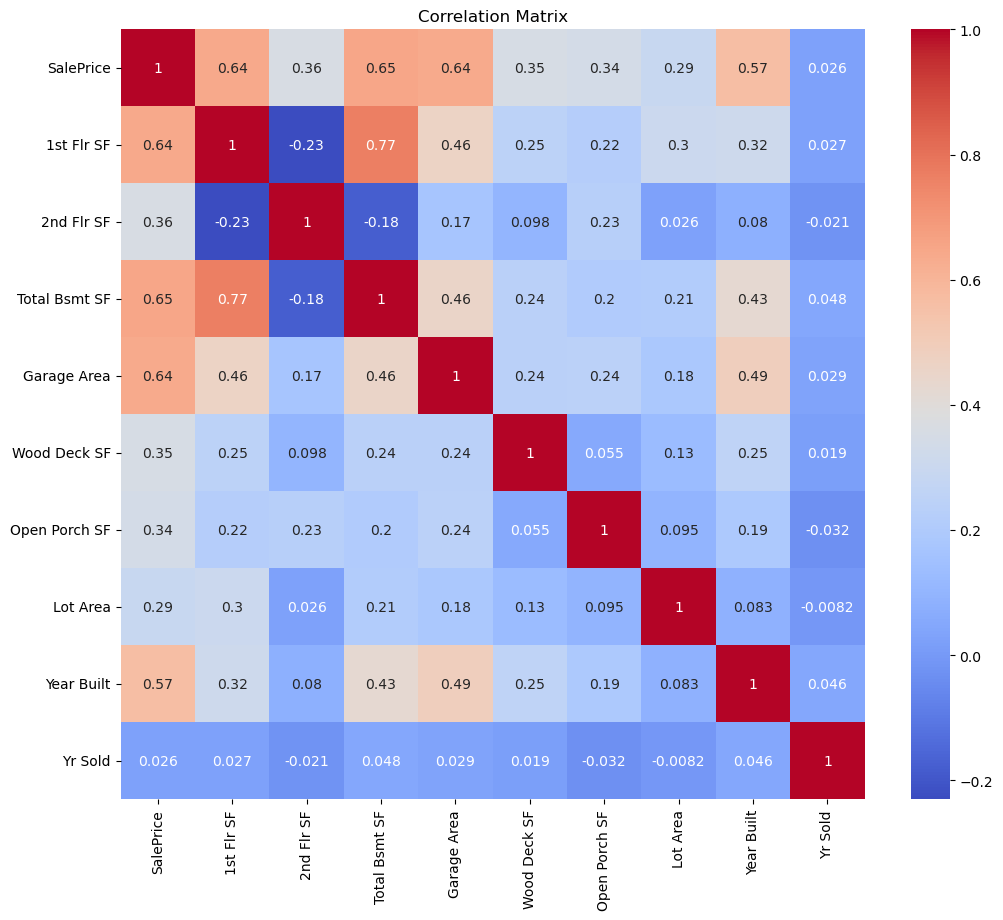

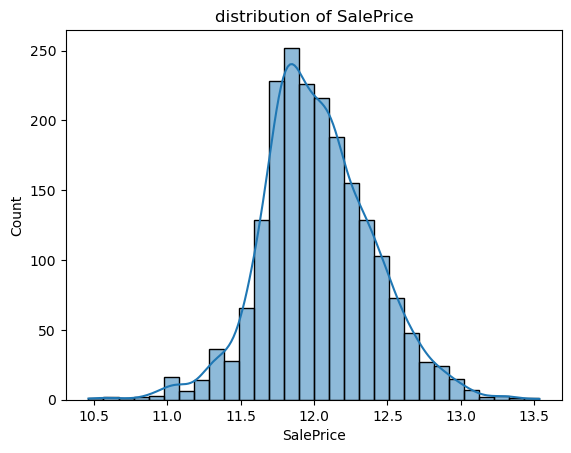

In [ ]:
# For Exercise 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
house = pd.read_csv('./house.csv', header=0)
house_filtered = house[(house['Bldg Type']=='1Fam') & (house['Sale Condition']=='Normal')]
house_filtered = house_filtered[['SalePrice','1st Flr SF', '2nd Flr SF', 'Total Bsmt SF', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Lot Area', 'Year Built', 'Yr Sold']]

# figure 1
plt.figure(figsize=(10, 6))
sns.histplot(house_filtered['SalePrice'], bins=30, kde=True)
plt.title('distribution of SalePrice')
plt.show()



correlation_matrix = house_filtered.corr()

# figure 2
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#figure 3
house_filtered['SalePrice'] = np.log1p(house_filtered['SalePrice'])
sns.histplot(house_filtered['SalePrice'], bins=30, kde=True)
plt.title('distribution of SalePrice')
plt.show()

- a) As the first graph show, the house prices in *house_filtered* are suitably distributed to construct the regression model, Because it has obvious characteristics of normal distribution, but because the tip is tilted to the left, we need to deal with it (refer to question c. 
- b) As the Second graph show, Yr Sold, Lot Area, Open Porch SF, Wood Deck SF should be remove   
- c) As the Third graph show, I use np.log1p to handling the function, the new image looks more like a normal distribution.

## <font color='red'>Exercise 3 (65 marks) </font>
After a preview of the data, you should move to this stage, i.e., implement your model and optimize its parameters to learn how to perform the regression task, i.e., predict house prices. <br>
In this exercise, you need to complete the following tasks: <br>

1. Split your data into features $\boldsymbol{X}\in\mathbb{R}^{d\times n}$, and targets (ground truth house prices) $\boldsymbol{y}\in\mathbb{R}^{1\times n}$. Initialize your regression model, i.e., the weight vector $\boldsymbol{w}\in\mathbb{R}^{d\times 1}$ and the bias value $b$ **(10 marks)**.
2. Build the computations you have discovered in **Exercise 1**, these computations will lead you to the MSE loss values and the gradients **(25 marks)**.
3. Apply gradient descents to train your regression model, iteratively update the parameters, i.e., the weight vector $\boldsymbol{w}\in\mathbb{R}^{d\times 1}$ and the bias value $b$. To simplify things, use all the data in each iteration of gradient descent **(10 marks)**.
4. Decide when to stop the optimization process (the gradient descent) and answer why do you want to stop the training here **(5 marks)**.
5. In the end, please summarize the regression performance of your regression model. How would you comment on such model performance? Use text to describe where you can improve the performance of the model and the rationality behind such improvements **(15 marks)**.

**Note**: <font color='red'>Please DO NOT use any Python libraries embedded with linear regression or gradient descent, you need to stick with basic functionalities of Numpy to code all computational processes, failed to comply with this will lead to an immediate 0 marks for Exercise 3.</font> <br>
**Note**: for simplicity, here you should focus only on the training stage and use all the data for training purposes. <br>
**Note**: you may want to explain the regression performance using the unit of "house prices".

In [8]:
import pandas as pd
import numpy as np

# get data
house = pd.read_csv('./house.csv', header=0)
house_filtered = house[(house['Bldg Type']=='1Fam') & (house['Sale Condition']=='Normal')]
house_filtered = house_filtered[['SalePrice','1st Flr SF', '2nd Flr SF', 'Total Bsmt SF', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Lot Area', 'Year Built', 'Yr Sold']]
house_filtered['SalePrice'] = np.log1p(house_filtered['SalePrice'])

# 1 split data
X = house_filtered[['1st Flr SF', 'Total Bsmt SF', 'Garage Area', 'Lot Area', 'Year Built']].values
y = house_filtered['SalePrice'].values

# deal with X
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
std[std == 0] = 1
X_scaled = (X - mean) / std

d = X_scaled.shape[1]
w = np.zeros(d)
b = 0

# 2 calculus from exercise1
def mse_loss(y_true, y_pred, w, lambda_reg=0.1):
    return np.mean(np.square(y_true - y_pred)) + lambda_reg * np.sum(np.square(w))

def compute_gradients(X, y, y_pred, w, lambda_reg):
    dw = (-2 / len(y)) * np.dot(X.T, (y - y_pred)) + 2 * lambda_reg * w
    db = (-2 / len(y)) * np.sum(y - y_pred)
    return dw, db

def predict(X, w, b):
    return np.dot(X, w) + b

def gradient_descent(X, y, w, b, learning_rate, num_iterations, lambda_reg):
    for i in range(num_iterations):
        y_pred = predict(X, w, b)
        dw, db = compute_gradients(X, y, y_pred, w, lambda_reg)
        w -= learning_rate * dw
        b -= learning_rate * db
        if i % 10 == 0:
            loss = mse_loss(y, y_pred, w, lambda_reg)
            print(f"Iteration {i}: Loss = {loss}")
    return w, b

# 4 I set num_iterations=1000, because the Loss decrease from 144 to 0.049 and stays roughly the same
learning_rate = 0.01  
num_iterations = 1000
lambda_reg = 0.1
w, b = gradient_descent(X_scaled, y, w, b, learning_rate, num_iterations, lambda_reg)

# 3
y_pred = predict(X_scaled, w, b)
final_loss = mse_loss(y, y_pred, w, lambda_reg)
print(f"Final Loss: {final_loss}")

# 5 a)
# My model is pretty good, the Loss is also gradually approaching zero, there is no gradient explosion and other phenomena
# 5 b)
# 1 Tuning the learning rate, the number of iterations, and the regularization parameter leads to better model performance.
# 2 Using techniques like cross-validation can help find the best hyperparameters.
# 3 To make sure the data is clean, I didn't check each selected feature to see if it doesn't have nan



Iteration 0: Loss = 144.71639012710978
Iteration 10: Loss = 96.60084009444499
Iteration 20: Loss = 64.4981647704721
Iteration 30: Loss = 43.07270599643743
Iteration 40: Loss = 28.771076391736784
Iteration 50: Loss = 19.223917890116788
Iteration 60: Loss = 12.850398124039815
Iteration 70: Loss = 8.595463912978687
Iteration 80: Loss = 5.754860948941792
Iteration 90: Loss = 3.858459248645395
Iteration 100: Loss = 2.5924081753668315
Iteration 110: Loss = 1.7471824655567936
Iteration 120: Loss = 1.1829026587356484
Iteration 130: Loss = 0.806184511431155
Iteration 140: Loss = 0.5546840709836832
Iteration 150: Loss = 0.38678003925430654
Iteration 160: Loss = 0.2746857007384414
Iteration 170: Loss = 0.19985041155168828
Iteration 180: Loss = 0.1498896030731161
Iteration 190: Loss = 0.11653522947015128
Iteration 200: Loss = 0.0942674702403245
Iteration 210: Loss = 0.07940124364092019
Iteration 220: Loss = 0.06947635543696334
Iteration 230: Loss = 0.06285035704830931
Iteration 240: Loss = 0.05842

### <font color='blue'>Submission</font>

You only need to submit the jupyter file in **ipynb** format, rename it as: A3_YOURID_YOURNAME (For instance: A3_2023141520000_Sofia) <br>